# Make a SPISEA Isochrone Object

In [1]:
import os
os.environ["PYSYN_CDBS"] = "/Users/joesum/cdbs/grp/redcat/trds"
os.environ['SPISEA_MODELS'] = "/Users/joesum/cdbs/grp/redcat/trds" 
# Import necessary packages. 
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

/Users/joesum/opt/anaconda3/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/joesum/cdbs/grp/redcat/trds/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [2]:
# Define isochrone parameters
logAge = np.log10(5e6)  # Age in log(years)
AKs = 0.8  # extinction in mags
dist = 4000  # distance in parsec
metallicity = 0  # Metallicity in [M/H]

# Define evolution/atmosphere models and extinction law
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()

# Also specify filters for synthetic photometry (optional). Here we use
# the HST WFC3-IR F127M, F139M, and F153M filters
# filt_list = ["wfc3,ir,f127m", "wfc3,ir,f139m", "wfc3,ir,f153m"]
# filt_list = ["ubv,U", "ubv,B", "ubv,V", "ubv,R", "ubv,I"] 
filt_list = ["johnson,u", "johnson,v"] 

# Make Isochrone object. Note that is calculation will take a few minutes, unless the
# isochrone has been generated previously.
my_iso = synthetic.IsochronePhot(
    logAge,
    AKs,
    dist,
    metallicity=0,
    evo_model=evo_model,
    atm_func=atm_func,
    red_law=red_law,
    filters=filt_list,
)


Changing to logg=4.00 for T= 31564 logg=3.99
Changing to logg=4.00 for T= 31746 logg=3.98
Changing to logg=4.00 for T= 31976 logg=3.97
Changing to logg=4.00 for T= 32247 logg=3.95
Changing to logg=4.00 for T= 32476 logg=3.94
Changing to logg=4.00 for T= 32664 logg=3.92
Changing to logg=4.00 for T= 32840 logg=3.90
Changing to logg=4.00 for T= 33026 logg=3.88
Changing to logg=4.00 for T= 33214 logg=3.86
Changing to logg=4.00 for T= 33385 logg=3.84
Changing to logg=4.00 for T= 33524 logg=3.82
Changing to logg=4.00 for T= 33550 logg=3.82
Changing to logg=4.00 for T= 33573 logg=3.81
Changing to logg=4.00 for T= 33591 logg=3.81
Changing to logg=4.00 for T= 33607 logg=3.80
Changing to logg=4.00 for T= 33623 logg=3.79
Changing to logg=4.00 for T= 33642 logg=3.79
Changing to logg=4.00 for T= 33667 logg=3.78
Changing to logg=4.00 for T= 33698 logg=3.77
Changing to logg=4.00 for T= 33716 logg=3.76
Changing to logg=4.00 for T= 33685 logg=3.74
Changing to logg=4.00 for T= 33620 logg=3.71
Changing t

In [18]:
# The individual points in the isochrone can be accessed using the points subfunction
# on the isochrone object. This produces an astropy table that contains the
# list of stellar masses in the isochrone and their associated properties
print(my_iso.points)


          L                   Teff        ...    m_hst_f153m    
          W                    K          ...                   
---------------------- ------------------ ... ------------------
 8.660109049222469e+24  2997.482453641835 ... 21.152021446497912
 9.046193280874383e+24 3008.7858260184175 ...  21.10504146354256
 9.449142476745298e+24 3020.1687795233192 ...  21.05840293861753
 9.869958611246552e+24  3031.631609685951 ...  21.01196961440262
 1.076707529684324e+25 3054.6500837349886 ... 20.919821469832158
1.0829426036763875e+25 3065.3879429582494 ... 20.915499755652853
1.1480726894593663e+25  3078.908328291189 ... 20.853895984647593
 1.221834686575575e+25  3093.002145149403 ... 20.788339065189557
1.3043887291289771e+25 3107.5858797888227 ... 20.717377389477456
1.3956010100862058e+25 3122.5861578385725 ... 20.642180492302245
                   ...                ... ...                ...
 3.146902975957394e+32 13997.739388490047 ...  5.930259429693542
3.1460717791216517e+32 13

In [4]:
# The isochrone table has meta keywords describing its properties
print(my_iso.points.meta)


OrderedDict([('REDLAW', 'H18b'), ('ATMFUNC', 'get_merged_atmosphere'), ('EVOMODEL', 'MISTv1'), ('LOGAGE', 6.698970004336019), ('AKS', 0.8), ('DISTANCE', 4000), ('METAL_IN', 0), ('METAL_ACT', 0.02380291467262473), ('WAVEMIN', 3000), ('WAVEMAX', 52000)])


In [5]:
print("The columns in the isochrone table are: {0}".format(my_iso.points.keys()))


The columns in the isochrone table are: ['L', 'Teff', 'R', 'mass', 'logg', 'isWR', 'mass_current', 'phase', 'm_hst_f127m', 'm_hst_f139m', 'm_hst_f153m']


In [6]:
# Identify a 1 M_sun star, print F127M, F139M, and F153M mags
idx = np.where(abs(my_iso.points['mass'] - 1.0) == min(abs(my_iso.points['mass'] - 1.0)) )[0]
f127m = np.round(my_iso.points[idx[0]]['m_hst_f127m'], decimals=3)
f139m = np.round(my_iso.points[idx[0]]['m_hst_f139m'], decimals=3)
f153m = np.round(my_iso.points[idx[0]]['m_hst_f153m'], decimals=3)
print('1 M_sun: F127M = {0} mag, F139M = {1} mag, F153M = {2} mag'.format(f127m, f139m, f153m))

1 M_sun: F127M = 19.047 mag, F139M = 18.446 mag, F153M = 17.773 mag


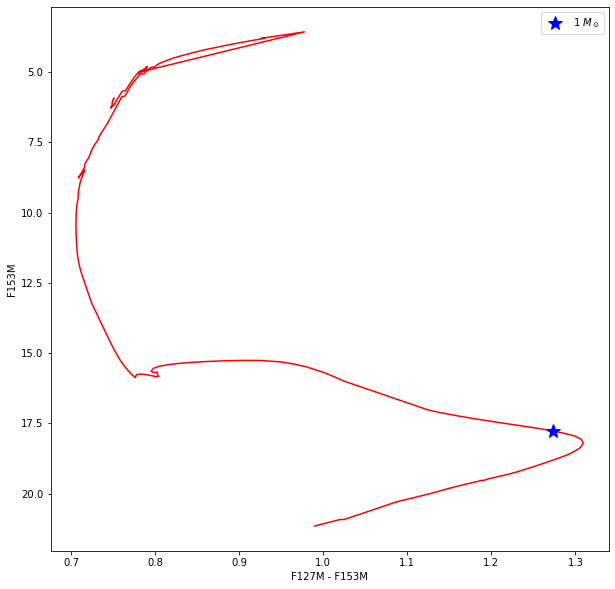

In [14]:
# Make a color-magnitude diagram
py.figure(1, figsize=(10, 10))
py.clf()
py.plot(
    my_iso.points["m_hst_f127m"] - my_iso.points["m_hst_f153m"],
    my_iso.points["m_hst_f153m"],
    "r-",
    label="_nolegend_",
)
py.plot(
    my_iso.points["m_hst_f127m"][idx] - my_iso.points["m_hst_f153m"][idx],
    my_iso.points["m_hst_f153m"][idx],
    "b*",
    ms=15,
    label="1 $M_\odot$",
)
py.xlabel("F127M - F153M")
py.ylabel("F153M")
py.gca().invert_yaxis()
py.legend();


# Make an Initial Mass Function

In [8]:
# Make multiplicity object
imf_multi = multiplicity.MultiplicityUnresolved()

# Make IMF object; we'll use a broken power law with the parameters from Kroupa+01.

# NOTE: when defining the power law slope for each segment of the IMF, we define
# the entire exponent, including the negative sign. For example, if dN/dm $\propto$ m^-alpha,
# then you would use the value "-2.3" to specify an IMF with alpha = 2.3. 

massLimits = np.array([0.2, 0.5, 1, 120]) # Define boundaries of each mass segement
powers = np.array([-1.3, -2.3, -2.3]) # Power law slope associated with each mass segment
my_imf = imf.IMF_broken_powerlaw(massLimits, powers, imf_multi)

# Make the Cluster

## Option 1: No compact objects

In [9]:
# Define total cluster mass
mass = 10 ** 5.0

# Make cluster object
cluster = synthetic.ResolvedCluster(my_iso, my_imf, mass)

# Look at star systems table
print(cluster.star_systems)


Found 86 stars out of mass range
        mass        isMultiple ...    m_hst_f153m     N_companions
------------------- ---------- ... ------------------ ------------
0.30332530533036883       True ... 18.883057333076266            1
0.49455831603319916       True ... 18.295716649606483            1
0.26289687803349143      False ... 19.799566196319454            0
 0.4757828608768549      False ... 18.912240041360832            0
0.21517657260929807      False ...  20.11557914634833            0
0.23743004494457606      False ...  19.96819273095009            0
  0.358913516452037      False ... 19.321781593846353            0
0.42599738025029976      False ... 19.069596376946816            0
 0.3391916313332764      False ...  19.40718394113667            0
 0.4492974069066079       True ...  18.30223892469618            1
                ...        ... ...                ...          ...
 0.2401185816343423      False ... 19.949019646415156            0
 0.5674270364624554      Fals

In [10]:
print('The cluster table contains these columns: {0}'.format(cluster.star_systems.keys()))


The cluster table contains these columns: ['mass', 'isMultiple', 'systemMass', 'Teff', 'L', 'logg', 'isWR', 'mass_current', 'phase', 'm_hst_f127m', 'm_hst_f139m', 'm_hst_f153m', 'N_companions']


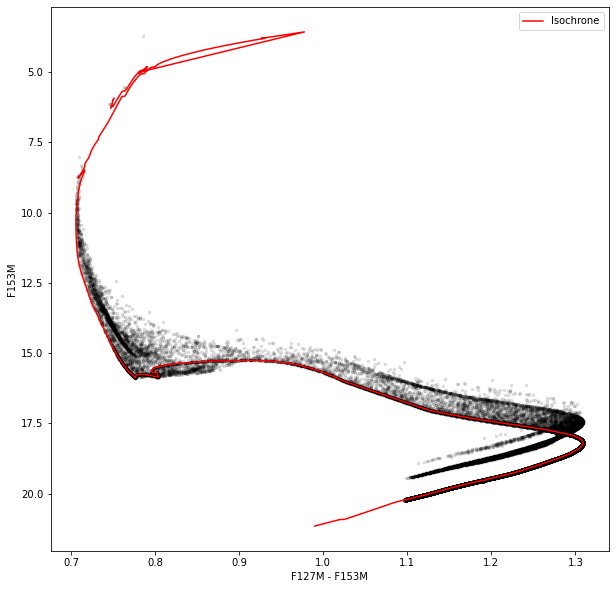

In [15]:
# Look at the cluster CMD, compared to input isochrone. Note the impact of
# multiple systems on the photometry
clust = cluster.star_systems
iso = my_iso.points

py.figure(2, figsize=(10, 10))
py.clf()
py.plot(
    clust["m_hst_f127m"] - clust["m_hst_f153m"],
    clust["m_hst_f153m"],
    "k.",
    ms=5,
    alpha=0.1,
    label="__nolegend__",
)
py.plot(
    iso["m_hst_f127m"] - iso["m_hst_f153m"], iso["m_hst_f153m"], "r-", label="Isochrone"
)
py.xlabel("F127M - F153M")
py.ylabel("F153M")
py.gca().invert_yaxis()
py.legend();


## Option 2: Compact objects (White dwarfs, neutron stars, and black holes)

In [12]:
# Create isochrone object  
filt_list = ['wfc3,ir,f153m'] # We won't be doing much with synthetic photometry here, so only 1 filter
my_ifmr = ifmr.IFMR()
my_iso_young = synthetic.IsochronePhot(8, 0, 10,
                                 evo_model = evolution.MISTv1(),
                                      filters=filt_list)

my_iso_old = synthetic.IsochronePhot(10, 0, 10,
                                 evo_model = evolution.MISTv1(),
                                    filters=filt_list)
# Create IMF object                                                                                                                                                        
massLimits = np.array([0.1, 0.5, 120])
powers_kroupa = np.array([-1.3, -2.3])
powers_theavy = np.array([-1.3, -1.3]) # top heavy
trunc_kroupa = imf.IMF_broken_powerlaw(massLimits, powers_kroupa)
trunc_theavy = imf.IMF_broken_powerlaw(massLimits, powers_theavy)

# Make cluster                                                                                                                                                             
cluster_mass = 10**6
cluster_young_theavy = synthetic.ResolvedCluster(my_iso_young, trunc_theavy, cluster_mass, ifmr=my_ifmr)
cluster_old_theavy = synthetic.ResolvedCluster(my_iso_old, trunc_theavy, cluster_mass, ifmr=my_ifmr)
cluster_young_kroupa = synthetic.ResolvedCluster(my_iso_young, trunc_kroupa, cluster_mass, ifmr=my_ifmr)
cluster_old_kroupa = synthetic.ResolvedCluster(my_iso_old, trunc_kroupa, cluster_mass, ifmr=my_ifmr)

# Get the outputs
young_theavy = cluster_young_theavy.star_systems
old_theavy = cluster_old_theavy.star_systems
young_kroupa = cluster_young_kroupa.star_systems
old_kroupa = cluster_old_kroupa.star_systems

Isochrone generation took 24.687590 s.
Making photometry for isochrone: log(t) = 8.00  AKs = 0.00  dist = 10
     Starting at:  2022-01-25 22:15:05.530205   Usually takes ~5 minutes
Starting filter: wfc3,ir,f153m   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.112 Msun  T =  3010 K  m_hst_f153m = 8.71
M =   1.612 Msun  T =  7715 K  m_hst_f153m = 2.10
M =   4.773 Msun  T = 13582 K  m_hst_f153m = -1.33
M =   5.013 Msun  T = 10084 K  m_hst_f153m = -2.79
M =   5.020 Msun  T =  4310 K  m_hst_f153m = -4.95
M =   5.271 Msun  T =  4854 K  m_hst_f153m = -5.22
M =   5.321 Msun  T =  3454 K  m_hst_f153m = -7.60
M =   5.324 Msun  T = 26655 K  m_hst_f153m = -3.20
M =   5.324 Msun  T = 192342 K  m_hst_f153m = 3.13
      Time taken: 13.59 seconds
Isochrone generation took 30.396779 s.
Making photometry for isochrone: log(t) = 10.00  AKs = 0.00  dist = 10
     Starting at:  2022-01-25 22:15:49.531195   Usually takes ~5 minutes
Starting filter: wfc3,ir,f153m   Elapsed time: 0.00 seco

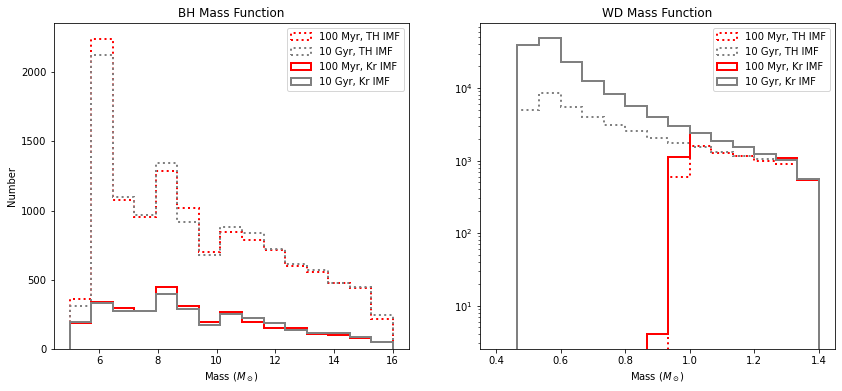

In [13]:
young_theavy_bh_idx = np.where(young_theavy["phase"] == 103)[0]
old_theavy_bh_idx = np.where(old_theavy["phase"] == 103)[0]
young_kroupa_bh_idx = np.where(young_kroupa["phase"] == 103)[0]
old_kroupa_bh_idx = np.where(old_kroupa["phase"] == 103)[0]

bh_bins = np.linspace(5, 16, 16)
wd_bins = np.linspace(0.4, 1.4, 16)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(
    young_theavy[young_theavy_bh_idx]["mass_current"],
    histtype="step",
    bins=bh_bins,
    label="100 Myr, TH IMF",
    color="red",
    linestyle=":",
    lw=2,
)
plt.hist(
    old_theavy[old_theavy_bh_idx]["mass_current"],
    histtype="step",
    bins=bh_bins,
    label="10 Gyr, TH IMF",
    color="gray",
    linestyle=":",
    lw=2,
)
plt.hist(
    young_kroupa[young_kroupa_bh_idx]["mass_current"],
    histtype="step",
    bins=bh_bins,
    label="100 Myr, Kr IMF",
    color="red",
    lw=2,
)
plt.hist(
    old_kroupa[old_kroupa_bh_idx]["mass_current"],
    histtype="step",
    bins=bh_bins,
    label="10 Gyr, Kr IMF",
    color="gray",
    lw=2,
)
plt.title("BH Mass Function")
plt.xlabel("Mass ($M_\odot$)")
plt.ylabel("Number")
plt.legend()

young_theavy_wd_idx = np.where(young_theavy["phase"] == 101)[0]
old_theavy_wd_idx = np.where(old_theavy["phase"] == 101)[0]
young_kroupa_wd_idx = np.where(young_kroupa["phase"] == 101)[0]
old_kroupa_wd_idx = np.where(old_kroupa["phase"] == 101)[0]

plt.subplot(1, 2, 2)
plt.hist(
    young_theavy[young_theavy_wd_idx]["mass_current"],
    histtype="step",
    bins=wd_bins,
    label="100 Myr, TH IMF",
    color="red",
    linestyle=":",
    lw=2,
)
plt.hist(
    old_theavy[old_theavy_wd_idx]["mass_current"],
    histtype="step",
    bins=wd_bins,
    label="10 Gyr, TH IMF",
    color="gray",
    linestyle=":",
    lw=2,
)
plt.hist(
    young_kroupa[young_kroupa_wd_idx]["mass_current"],
    histtype="step",
    bins=wd_bins,
    label="100 Myr, Kr IMF",
    color="red",
    lw=2,
)
plt.hist(
    old_kroupa[old_kroupa_wd_idx]["mass_current"],
    histtype="step",
    bins=wd_bins,
    label="10 Gyr, Kr IMF",
    color="gray",
    lw=2,
)
plt.yscale("log")
plt.title("WD Mass Function")
plt.xlabel("Mass ($M_\odot$)")
plt.legend();
